In [1]:
from dataset import get_loader
from utils import plot_batch

In [2]:
from pathlib import Path

In [3]:
from config import Config

In [4]:
celeb_path = Path('./data/CelebA')
train_path = celeb_path / 'train'
test_path = celeb_path / 'test'
val_path = celeb_path / 'validation'

In [5]:
model_id = 'vit_b32'

In [6]:
config = Config(
    model_id=model_id,
    img_size=224,
    train_path=train_path,
    test_path=test_path,
    val_path=val_path,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

In [7]:
batch_size = 2
image_limit = 2

learning_rate = 1e-8
num_epochs = 10

debug = True
debug_step = 5

In [8]:
train_loader = get_loader(
    data_path=train_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

In [9]:
val_loader = get_loader(
    data_path=val_path,
    config=config,
    batch_size=batch_size,
    image_limit=image_limit,
    augment=True
)

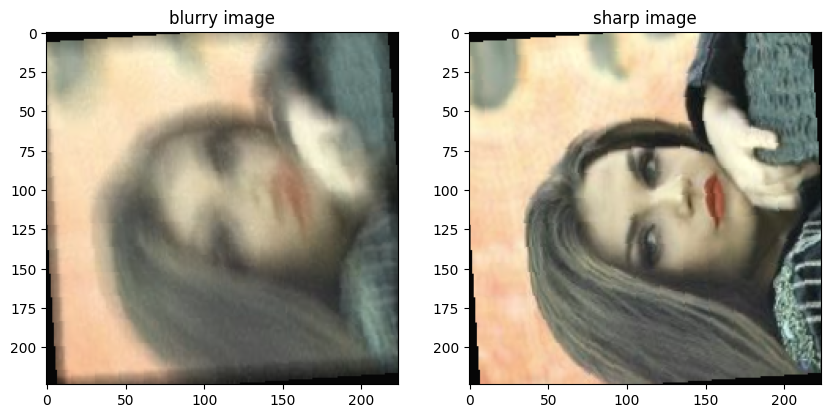

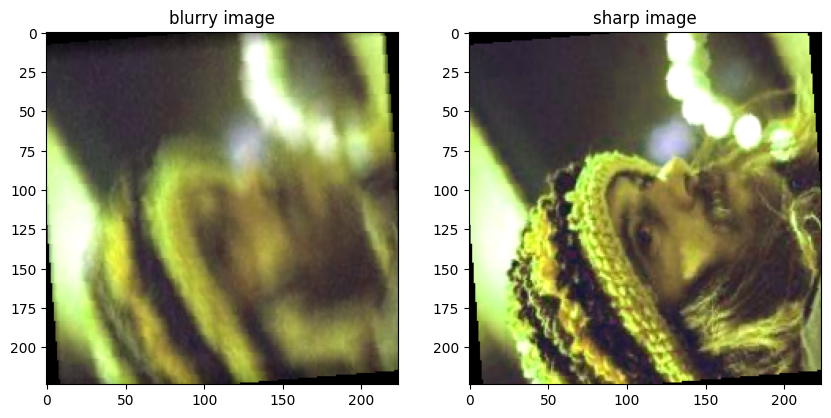

In [10]:
plot_batch(train_loader, config=config, batch_index=0)

In [11]:
from cnn import get_cnn
from vit import get_vit

In [12]:
model = get_vit(config=config)

In [13]:
from loss import SUPPORTED_LOSS, get_loss

In [22]:
print(f'Supported losses: {list(SUPPORTED_LOSS.keys())}')

Supported losses: ['L1', 'MSE', 'PSNR']


In [15]:
criterion = get_loss('mse')

In [16]:
from trainer import Trainer

In [17]:
import torch

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
trainer = Trainer(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    config=config,
    debug=debug,
    debug_step=debug_step
)

In [20]:
Trainer.supported_models()

['resnet50',
 'resnet101',
 'resnet152',
 'inception_v3',
 'vit_b32',
 'vit_l32',
 'vit_h14']

Starting Epoch 1 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

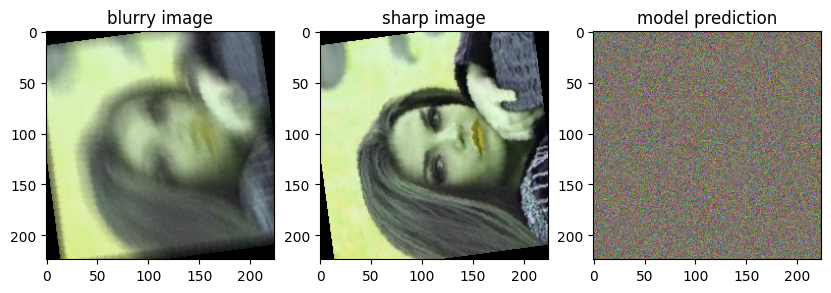

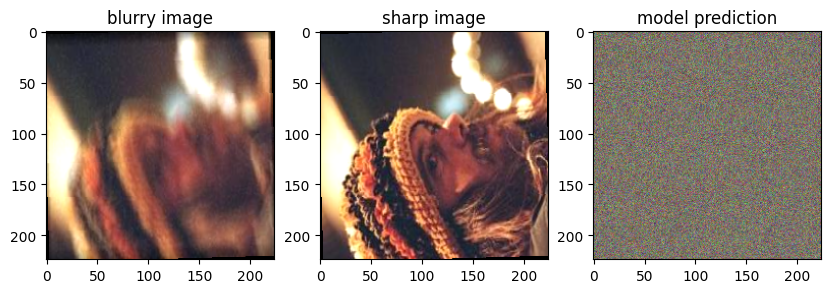

100%|██████████| 1/1 [00:00<00:00, 33.58batch/s]


Epoch: 1, Train loss: 3.3660, Validation loss: 3.2471
Starting Epoch 2 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.64batch/s]


Epoch: 2, Train loss: 4.2244, Validation loss: 4.3741
Starting Epoch 3 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.83batch/s]


Epoch: 3, Train loss: 4.1058, Validation loss: 3.3077
Starting Epoch 4 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.74batch/s]


Epoch: 4, Train loss: 2.8999, Validation loss: 3.4829
Starting Epoch 5 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

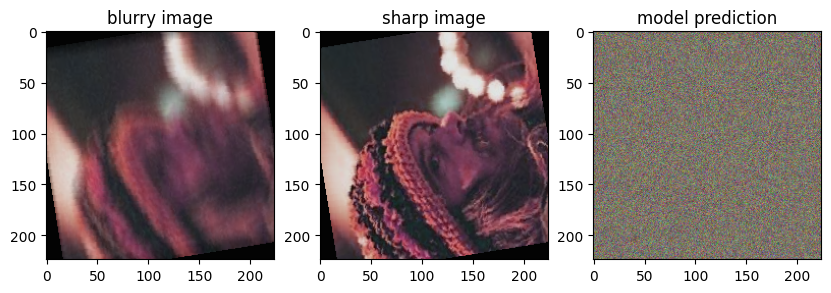

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0103780925..0.9110968].


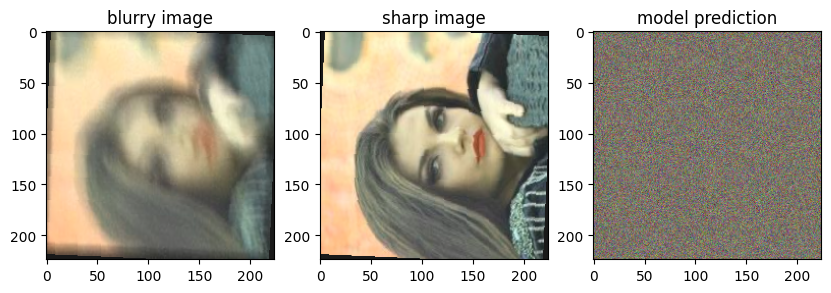

100%|██████████| 1/1 [00:00<00:00, 34.18batch/s]


Epoch: 5, Train loss: 3.0711, Validation loss: 3.4366
Starting Epoch 6 of 10.


100%|██████████| 1/1 [00:00<00:00, 33.31batch/s]


Epoch: 6, Train loss: 2.9967, Validation loss: 3.9003
Starting Epoch 7 of 10.


100%|██████████| 1/1 [00:00<00:00, 33.01batch/s]


Epoch: 7, Train loss: 3.7449, Validation loss: 3.0508
Starting Epoch 8 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.94batch/s]


Epoch: 8, Train loss: 2.4025, Validation loss: 3.7012
Starting Epoch 9 of 10.


100%|██████████| 1/1 [00:00<00:00, 32.89batch/s]


Epoch: 9, Train loss: 3.5518, Validation loss: 3.0087
Starting Epoch 10 of 10.


  0%|          | 0/1 [00:00<?, ?batch/s]

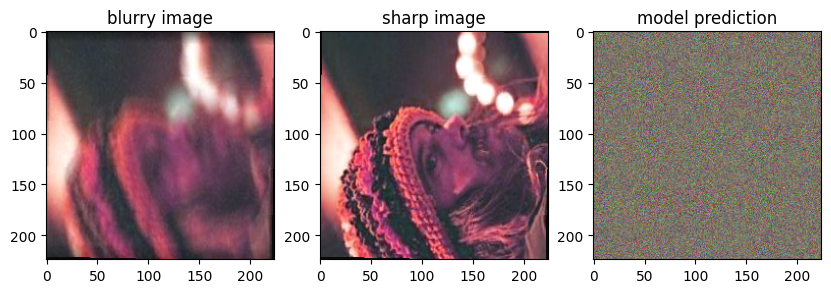

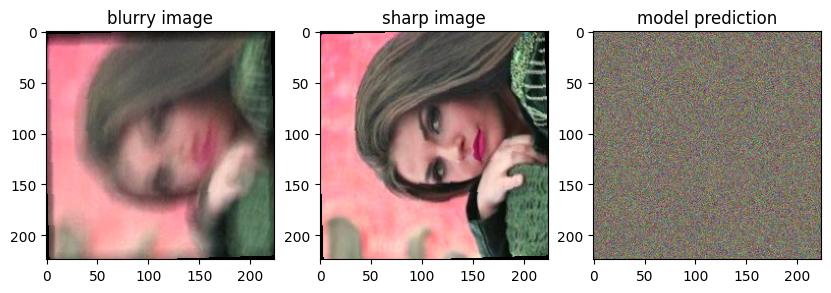

100%|██████████| 1/1 [00:00<00:00, 34.56batch/s]

Epoch: 10, Train loss: 2.7506, Validation loss: 3.6717


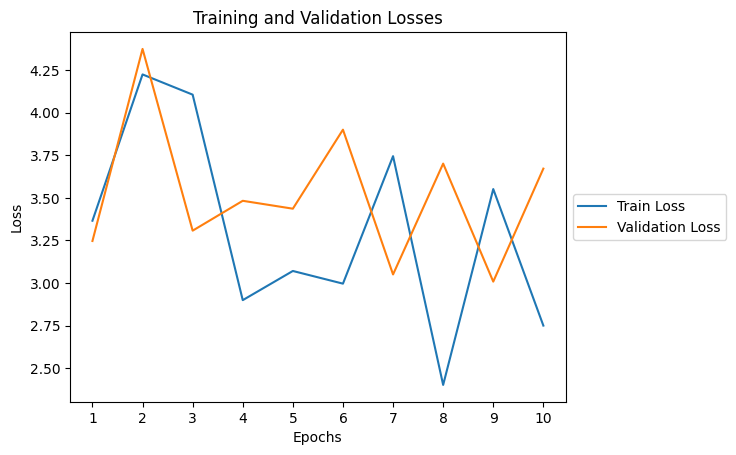

In [21]:
trainer.train(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=num_epochs
)